In [2]:
import pandas as pd
path = 'C:/Users/wnduq/Desktop/'
data = pd.read_csv(path + 'nyt1.csv')
data.columns   
#data.shape

Index(['Age', 'Gender', 'Impressions', 'Clicks', 'Signed_In'], dtype='object')

## age_group 생성

In [4]:
#age_group 생성
tmp = []
for i in data['Age']:   
    if i <18:
        tmp.append('18')
    elif i<=24:
        tmp.append('18-24')
    elif i<=35:
        tmp.append('35-44')
    elif i<=45:
        tmp.append('45-54')
    elif i<=55:
        tmp.append('55-64')
    else:
        tmp.append('65+')
data['age_group'] = tmp

##  범주에 대해 노출횟수와 클릭률의 분포

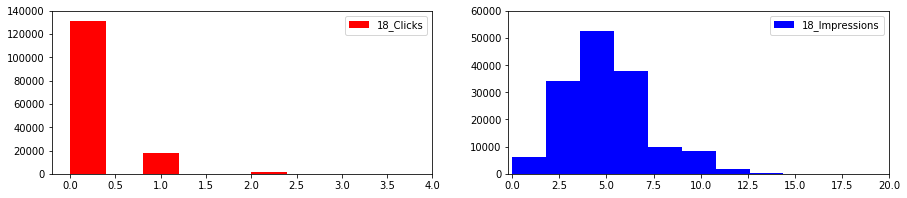

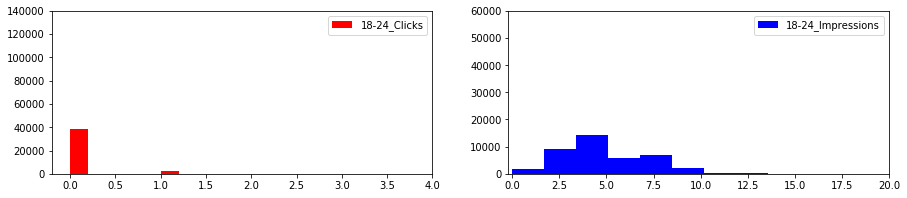

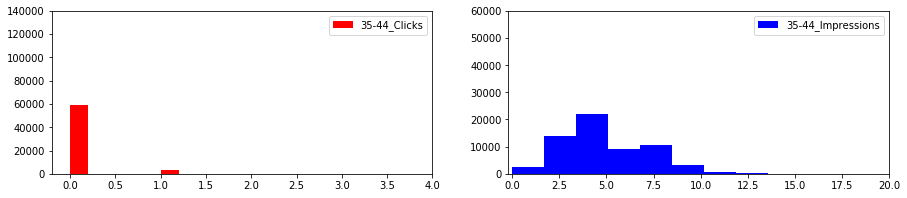

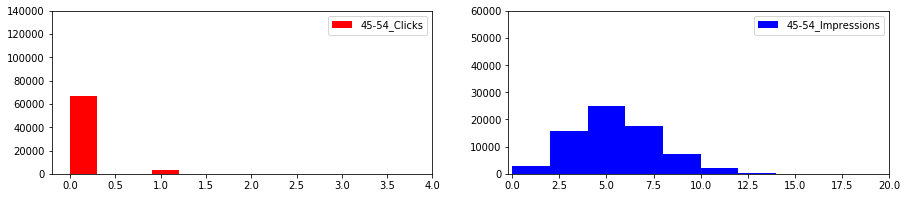

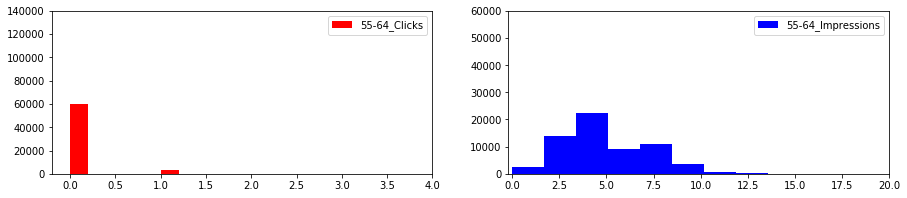

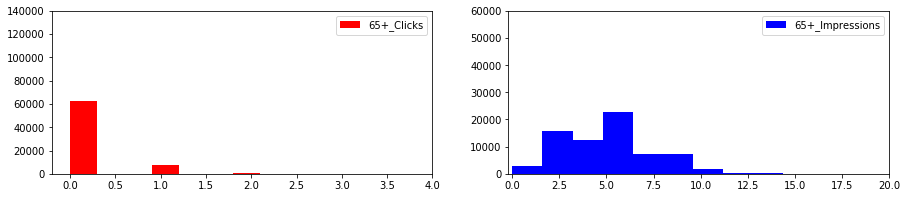

In [5]:
import matplotlib.pyplot as plt
for i in ['18','18-24','35-44','45-54','55-64','65+']:
    f, axis = plt.subplots(1,2,figsize = (15,3)) 
    axis[0].hist(data[data['age_group']==i]['Clicks'], color = 'red', label = '{}_Clicks'.format(i))
    axis[0].axis([-0.2,4,0,140000]) 
    axis[0].legend()
    axis[1].hist(data[data['age_group']==i]['Impressions'], color = 'Blue', label = '{}_Impressions'.format(i))
    axis[1].axis([-0.2,20,0,60000]) 
    axis[1].legend()

10대에서 광고 노출이나 클릭수가 압도적으로 많다.

## 클릭행동에 기반하여 새롭게 범주화하는 변수를 생성

In [10]:
tmp = []

for idx,cont in enumerate(data['Clicks']):  
    if cont < 0.5: 
        tmp.append('low')
    elif cont < 1.5 :
        tmp.append('middle')
    else:
        tmp.append('high')

        
data['Click_level'] = tmp

In [25]:
from collections import Counter
count = Counter(data['Click_level'])
count.values()

dict_values([2466, 37372, 418603])

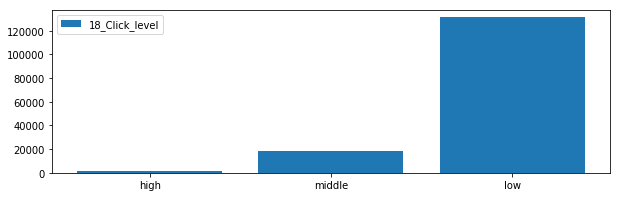

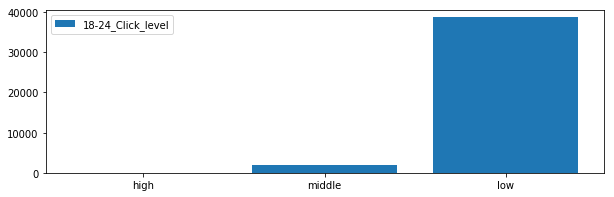

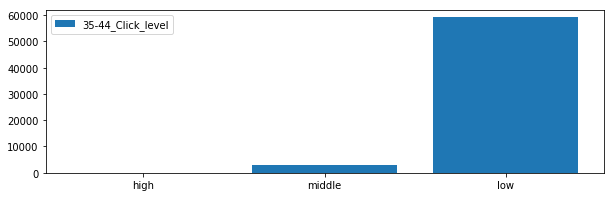

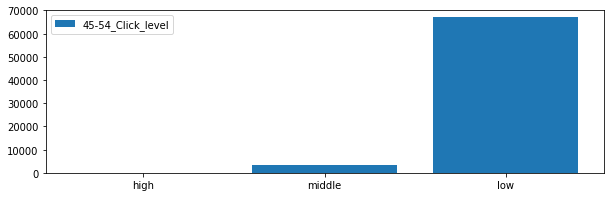

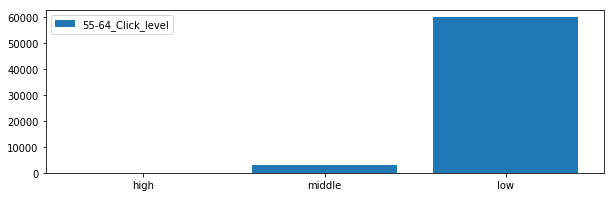

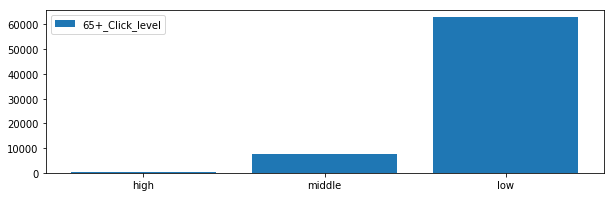

In [36]:
for i in ['18','18-24','35-44','45-54','55-64','65+']:
    f, axis = plt.subplots(figsize = (10,3))
    count = Counter(data[data['age_group']==i]['Click_level'])
    axis.bar(count.keys(),count.values(), label = '{}_Click_level'.format(i))
    axis.legend()

under18 그룹과 over65 그룹이 클릭이 많은 사람의 비율이 많다.

# 인구통계적 특성에 따른 분류

([<matplotlib.patches.Wedge at 0x1a011562d30>,
 [Text(0.6133370972476974, 1.031415340752584, '18'),
  Text(-0.9161137833926118, 0.6088805596158207, '65+'),
  Text(-1.0824686383275655, -0.19560584612241644, '18-24'),
  Text(-0.6919974442259536, -0.8550669781863574, '55-64'),
  Text(0.19475552658434145, -1.0826219491885687, '35-44'),
  Text(0.9738902698892714, -0.511407608679224, '45-54')],
 [Text(0.35777997339449014, 0.6016589487723405, '32.92%'),
  Text(-0.499698427305061, 0.33211666888135666, '15.48%'),
  Text(-0.5904374390877629, -0.1066940978849544, '8.88%'),
  Text(-0.37745315139597463, -0.46640016991983124, '13.77%'),
  Text(0.1062302872278226, -0.5905210631937647, '13.55%'),
  Text(0.531212874485057, -0.2789496047341221, '15.39%')])

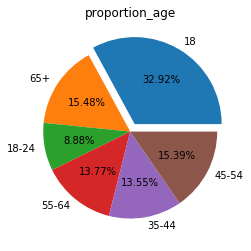

In [54]:
count = Counter(data['age_group'])
size = list(map(lambda x : round((x/sum(count.values()))*100,2) ,count.values()))
plt.title('proportion_age')
plt.pie(x = size, labels = count.keys(),autopct='%1.2f%%',explode=(0.1, 0, 0,0,0,0))

# 광고노출이 있는 그룹에서 클릭률

In [57]:
sum(data['Impressions']==0)

3066

In [ ]:
data_click = data[data['Impressions']!=0]

# 연령별 성별 클릭률

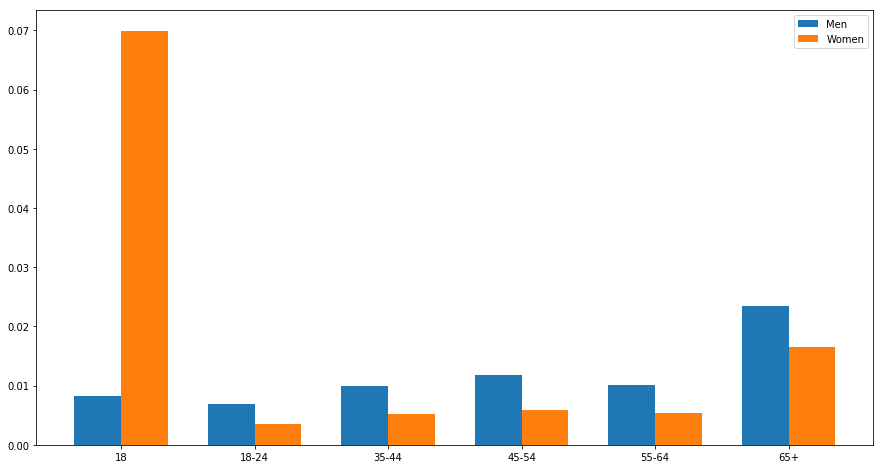

In [136]:
import numpy as np
import matplotlib

male_list = []
female_list = []

for i in ['18','18-24','35-44','45-54','55-64','65+']:
    tmp = data_click[data_click['Gender']==1]
    male = sum(tmp[tmp['age_group']==i]['Clicks'])/len(tmp)
    tmp2 = data_click[data_click['Gender']==0]
    female = sum(tmp2[tmp2['age_group']==i]['Clicks'])/len(tmp2)
    male_list.append(male)
    female_list.append(female)

labels = ['18','18-24','35-44','45-54','55-64','65+']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x-width/2,male_list,width,label = 'Men')
ax.bar(x+width/2,female_list,width,label ='Women')

ax.set_ylabel = 'clicks'
ax.set_title = 'clicks_by_age_and_gender'
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('./fig.png',dpi = 300)

plt.show()


전반적으로 남성이 클릭하는 빈도가 더 높고, 십대여성이 다른 집단에 비해 클릭률이 매우 높았다.
이러한 특성이 해당 일자에만 해당하는 것인지는 다른 날짜와 비교해 보면 알 수 있다.

# 과정을 pipeline으로 구축하기

In [125]:
def get_new(file_path):
    
    data = data = pd.read_csv(file_path)

    def group_by_age(data):
        tmp = []
        for i in data['Age']:   
            if i <18:
                tmp.append('18')
            elif i<=24:
                tmp.append('18-24')
            elif i<=35:
                tmp.append('35-44')
            elif i<=45:
                tmp.append('45-54')
            elif i<=55:
                tmp.append('55-64')
            else:
                tmp.append('65+')
        data['age_group'] = tmp

    def get_fig(data):

        #clicks and impression
        import matplotlib.pyplot as plt
        for i in ['18','18-24','35-44','45-54','55-64','65+']:
            f, axis = plt.subplots(1,2,figsize = (15,3)) 
            axis[0].hist(data[data['age_group']==i]['Clicks'], color = 'red', label = '{}_Clicks'.format(i))
            axis[0].axis([-0.2,4,0,140000]) 
            axis[0].legend()
            axis[1].hist(data[data['age_group']==i]['Impressions'], color = 'Blue', label = '{}_Impressions'.format(i))
            axis[1].axis([-0.2,20,0,60000]) 
            axis[1].legend()
        plt.show()

        #클릭행동기반 그룹화
        tmp = []
        for idx,cont in enumerate(data['Clicks']):  
            if cont < 0.5: 
                tmp.append('low')
            elif cont < 1.5 :
                tmp.append('middle')
            else:
                tmp.append('high')
        data['Click_level'] = tmp

        for i in ['18','18-24','35-44','45-54','55-64','65+']:
            f, axis = plt.subplots(figsize = (10,3))
            count = Counter(data[data['age_group']==i]['Click_level'])
            axis.bar(count.keys(),count.values(), label = '{}_Click_level'.format(i))
            axis.legend()
        plt.show()

        #인구통계특성
        count = Counter(data['age_group'])
        size = list(map(lambda x : round((x/sum(count.values()))*100,2) ,count.values()))
        plt.title('proportion_age')
        plt.pie(x = size, labels = count.keys(),autopct='%1.2f%%',explode=(0.1, 0, 0,0,0,0))
        plt.show()

        #노출없는 그룹은 제외
        data_click = data[data['Impressions']!=0]

        #연령별 성별 클릭률
        import numpy as np
        import matplotlib

        male_list = []
        female_list = []

        for i in ['18','18-24','35-44','45-54','55-64','65+']:
            tmp = data_click[data_click['Gender']==1]
            male = sum(tmp[tmp['age_group']==i]['Clicks'])/len(tmp)
            tmp2 = data_click[data_click['Gender']==0]
            female = sum(tmp2[tmp2['age_group']==i]['Clicks'])/len(tmp2)
            male_list.append(male)
            female_list.append(female)

        labels = ['18','18-24','35-44','45-54','55-64','65+']
        x = np.arange(len(labels))
        width = 0.35

        fig, ax = plt.subplots()

        ax.bar(x-width/2,male_list,width,label = 'Men')
        ax.bar(x+width/2,female_list,width,label ='Women')

        ax.set_ylabel = 'clicks'
        ax.set_title = 'clicks_by_age_and_gender'
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        plt.show()
        
    group_by_age(data)
    get_fig(data)

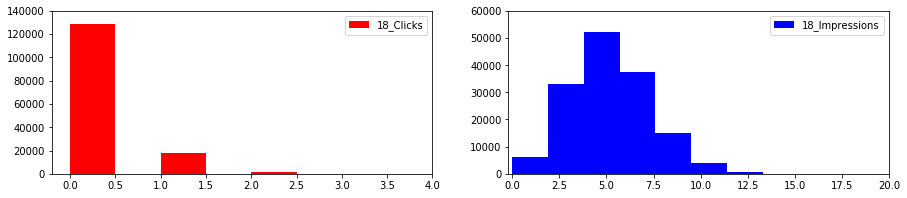

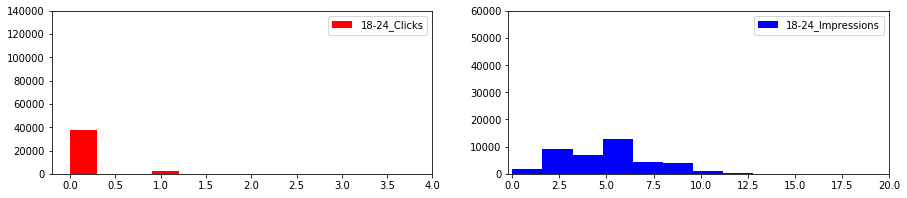

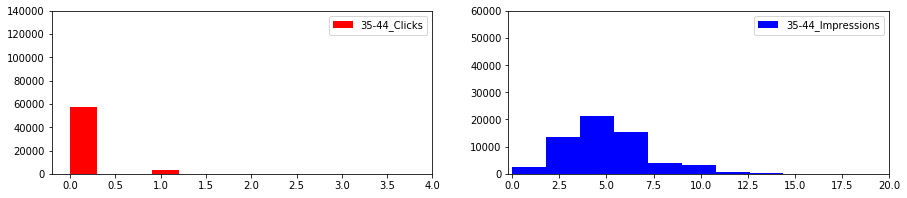

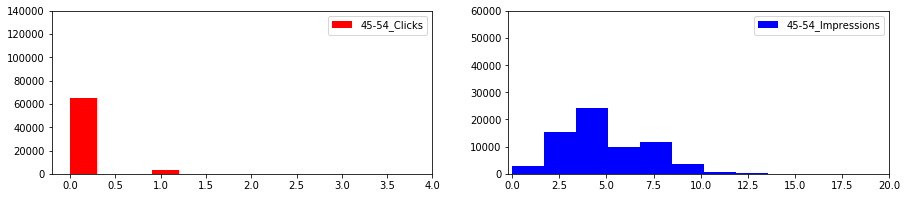

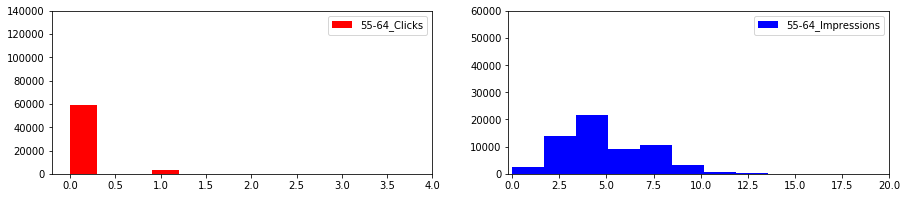

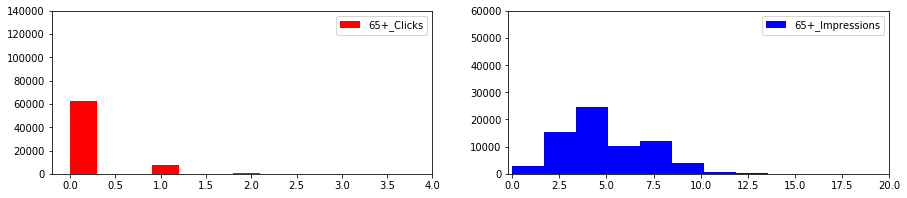

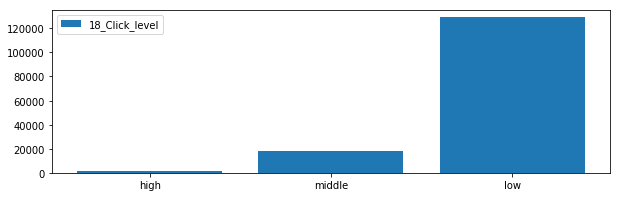

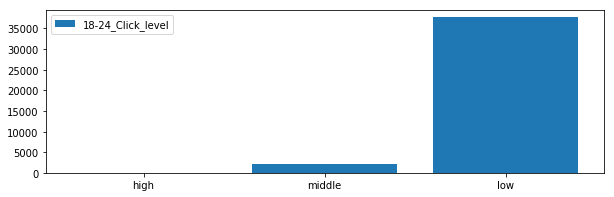

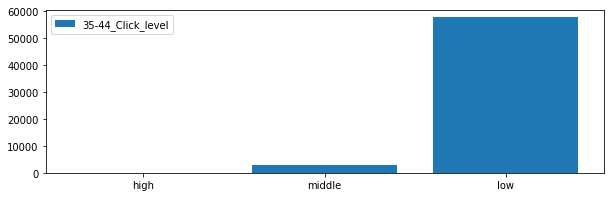

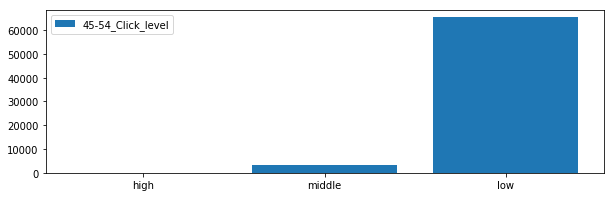

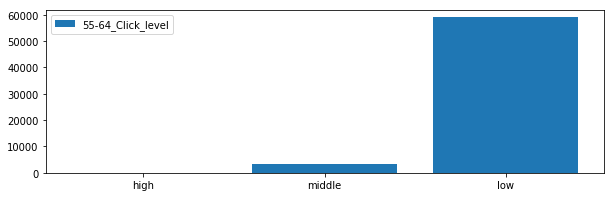

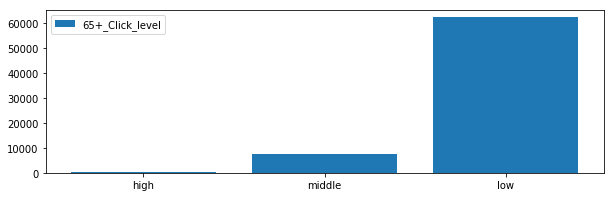

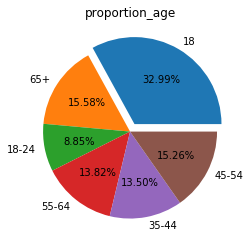

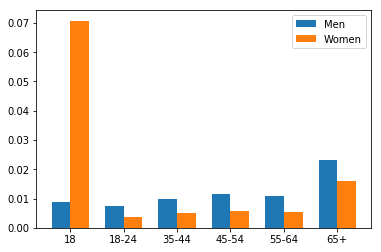

In [126]:
 get_new('C:/Users/wnduq/Desktop/nyt2.csv')

2일차에서도 역시 십대 여성의 클릭률이 다른 집단에 비해 매우 높은 것으로 보인다.